# El problema de la mochila

Se tiene una mochila y un conjunto de artículos con diferente peso y valor. Se intenta determinar que artículos se pueden colocar adentro de la mochila de manera que no se sobrepase el límite de peso de la mochila maximizando el valor total. 

Resolver el problema agregando heurística para los siguientes artículos y un límite de 30kg:

<table style="font-size:16px">
    <tr>
        <th>Item</th><td>Valor</td><td>Peso</td>
    </tr>
    <tr>
        <th>A</th><td>4</td><td>12</td>
    </tr>
    <tr>
        <th>B</th><td>2</td><td>2</td>
    </tr>
    <tr>
        <th>C</th><td>10</td><td>4</td>
    </tr>
    <tr>
        <th>D</th><td>1</td><td>1</td>
    </tr>
    <tr>
        <th>E</th><td>5</td><td>15</td>
    </tr>
    <tr>
        <th>F</th><td>3</td><td>2</td>
    </tr>
    <tr>
        <th>G</th><td>14</td><td>7</td>
    </tr>
    <tr>
        <th>H</th><td>4</td><td>10</td>
    </tr>
</table>

In [60]:
from random import randint, choice

import matplotlib.pyplot as plt
import numpy as np

## Codificación

- Definir como se codificará el problema

Funcion objetivo (Funcion Fitness):
    Z = 4x1 + 2x2 + 10x3 + x4 + 5x5 + 3x6 + 14x7 + 4x8
    
Condiciones del peso:
    12x1 + 2x2 + 4x3 + x4 + 15x5 + 2x6 + 7x7 + 10x8
    La sumatoria de los pesos no puede ser mayor a 30...

In [61]:
initial_population = [
    [randint(0, 1) * 12,
     randint(0, 1) * 2,
     randint(0, 1) * 4,
     randint(0, 1) * 1,
     randint(0, 1) * 15,
     randint(0, 1) * 2,
     randint(0, 1) * 7,
     randint(0, 1) * 10]
    for _ in range(50)
]

population = [i for i in initial_population if sum(i) <= 30]


## Adaptación

- Definir como se calculará la adaptación de un individuo
- ¿Existen estados que deben ser penalizados?
- Se debera penalizar, aqullos estados en que el peso supere a los 30 kilogramos

In [62]:
def adaptation_function():
    return [
        ((i[0] * 4) +
         (i[1] * 2) +
         (i[2] * 10) +
         (i[3] * 1) +
         (i[4] * 5) +
         (i[5] * 3) +
         (i[6] * 14) +
         (i[7] * 4)) for i in population
    ]

## Selección

In [63]:
def probability(fitness):
    def rank():
        array = np.array(fitness)
        temp = array.argsort()
        return (np.arange(len(array))[temp.argsort()]).tolist()
    ranking = rank()

    return [((ranking[i]) / sum(ranking)) for i in range(len(population))]


def select_parents(parents_num, population_size, probability_list):
    population_aux = range(population_size)
    parent_indexs = np.random.choice(population_aux,size=parents_num, replace=False, p=probability_list)
    return [population[i] for i in parent_indexs]

## Cruza

In [64]:
def crossover(parents):
    parents = np.array(parents)
    childrens = np.empty((len(parents),parents.shape[1]))

    crossover_point = np.uint8(parents.shape[0]/2)

    for k in range(len(parents)):
        parent1_idx = k%parents.shape[0]
        parent2_idx = (k+1)%parents.shape[0]

        childrens[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        childrens[k, crossover_point:] = parents[parent2_idx, crossover_point:]

    return childrens

## Mutación

In [65]:
def mutation(childrens):
    for index, children in enumerate(childrens):
        random_index = choice(range(8)) # Poblacion: 8 => Cantidad de elemtos
        childrens[index][random_index] = randint(0, 30)
    return childrens

# Algoritmo

In [66]:
population_len = len(population)
best_adaptation = list()
generation = list()

for i in range(200):
    fitness = adaptation_function()
    probability_list = probability(fitness)
    selected_parents = select_parents(population_len // 2, population_len, probability_list)

    childrens = crossover(selected_parents)
    childrens = mutation(childrens)

    selected_parents.extend(childrens.tolist())
    new_population = selected_parents

    population_len = len(new_population)
    population = new_population
    best_adaptation.append(max(fitness))
    generation.append(i)

# Grafico

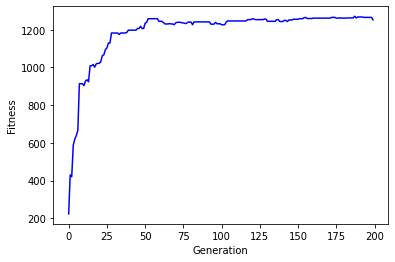

In [67]:
fig, ax = plt.subplots()
ax.plot(generation, best_adaptation, 'b')
ax.set_ylabel('Fitness')
ax.set_xlabel('Generation')
plt.show()